# Password Strength Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv('data.csv',',',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

In [3]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [4]:
data.shape

(669640, 2)

In [5]:
data['password'].unique()

array(['kzde5577', 'kino3434', 'visi7k1yr', ..., '184520socram',
       'marken22a', 'fxx4pw4g'], dtype=object)

In [6]:
data.isnull().any()

password     True
strength    False
dtype: bool

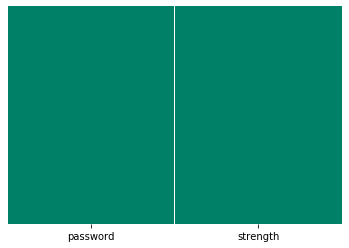

In [7]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False ,cmap='summer')

In [8]:
#as password has null so delete it with out replacement
data.dropna(inplace=True)

In [9]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [10]:
data.shape

(669639, 2)

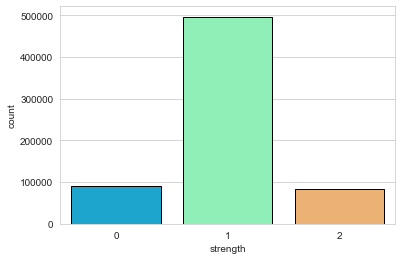

In [11]:
sns.set_style('whitegrid')
sns.countplot('strength', data = data,palette='rainbow',edgecolor=(0,0,0))

In [12]:
#into characetrs
def character(input):
    char=[]
    for i in input:
        char.append(i)
    return char

In [13]:
X=character(data['password'])

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=character)
X=vectorizer.fit_transform(X)

In [15]:
X.shape

(669639, 153)

In [16]:
vectorizer.vocabulary_

{'k': 66,
 'z': 81,
 'd': 59,
 'e': 60,
 '5': 39,
 '7': 41,
 'i': 64,
 'n': 69,
 'o': 70,
 '3': 37,
 '4': 38,
 'v': 77,
 's': 74,
 '1': 35,
 'y': 80,
 'r': 73,
 'm': 68,
 'g': 62,
 '2': 36,
 'l': 67,
 'a': 56,
 'b': 57,
 'h': 63,
 'q': 72,
 'f': 61,
 't': 75,
 'u': 76,
 '6': 40,
 'c': 58,
 '8': 42,
 'w': 78,
 '9': 43,
 '0': 34,
 'j': 65,
 'p': 71,
 '@': 49,
 '-': 31,
 'x': 79,
 '.': 32,
 '>': 47,
 '&': 26,
 '?': 48,
 '<': 45,
 '!': 21,
 ';': 44,
 '_': 54,
 '%': 25,
 '±': 99,
 '"': 22,
 '~': 85,
 '+': 30,
 '^': 53,
 '/': 33,
 '$': 24,
 ')': 28,
 ' ': 20,
 '(': 27,
 '#': 23,
 'ú': 138,
 '*': 29,
 '`': 55,
 '{': 82,
 '}': 84,
 '[': 50,
 ']': 52,
 'þ': 142,
 'ó': 132,
 'ô': 133,
 '=': 46,
 '\\': 51,
 '\x1c': 17,
 '³': 101,
 '¿': 112,
 '\x16': 12,
 'ò': 131,
 '·': 105,
 '\x1e': 19,
 '\x19': 15,
 '\x05': 3,
 '\x1b': 16,
 'å': 120,
 '‚': 147,
 'ä': 119,
 'à': 115,
 'õ': 134,
 'ß': 114,
 '´': 102,
 '«': 96,
 'ð': 129,
 'â': 117,
 '°': 98,
 '|': 83,
 '\x7f': 86,
 '²': 100,
 '¾': 111,
 'ÿ': 143,

In [17]:
y=data['strength']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #splitting


In [19]:
!pip install -q keras

In [20]:
import keras

Using TensorFlow backend.
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Future

In [21]:
!pip install tensorflow==1.14.0

  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0
  Rolling back uninstall of tensorflow
  Moving to c:\users\hp\anaconda3\lib\site-packages\tensorflow-2.1.0.dist-info\
   from c:\users\hp\anaconda3\lib\site-packages\~ensorflow-2.1.0.dist-info
  Moving to c:\users\hp\anaconda3\lib\site-packages\tensorflow\__init__.py
   from C:\Users\hp\AppData\Local\Temp\pip-uninstall-7xf4op8h\__init__.py
  Moving to c:\users\hp\anaconda3\lib\site-packages\tensorflow\__pycache__\
   from c:\users\hp\anaconda3\lib

ERROR: tensorflow-gpu 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 1.14.0 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\hp\\anaconda3\\Lib\\site-packages\\tensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Consider using the `--user` option or check the permissions.



In [25]:
from keras.optimizers import Adam

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 76, kernel_initializer = 'he_uniform', activation = 'relu', input_dim =153))
classifier.add(Dropout(0.4))
# Adding the second hidden layer

# Adding the second hidden layer
classifier.add(Dense(units = 76, kernel_initializer = 'he_uniform', activation = 'relu'))
classifier.add(Dropout(0.4))

# Adding the output layer
classifier.add(Dense(units = 3, kernel_initializer = 'he_uniform', activation = 'sigmoid'))


# Compiling the CNN
classifier.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [27]:
classifier.fit(X_train, y_train, batch_size = 64, verbose = 1,epochs = 20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
535711/535711 [==============================] - 87s 162us/step - loss: 0.4310 - accuracy: 0.8005
Epoch 2/20
535711/535711 [==============================] - 80s 150us/step - loss: 0.3602 - accuracy: 0.8147
Epoch 3/20
535711/535711 [==============================] - 77s 144us/step - loss: 0.3437 - accuracy: 0.8173
Epoch 4/20
535711/535711 [==============================] - 79s 147us/step - loss: 0.3351 - accuracy: 0.8186
Epoch 5/20
535711/535711 [==============================] - 75s 140us/step - loss: 0.3296 - accuracy: 0.8199
Epoch 6/20
535711/535711 [==============================] - 76s 141us/step - loss: 0.3249 - accuracy: 0.8211
Epoch 7/20
535711/535711 [==============================] - 74s 139us/step - loss: 0.3222 - accuracy: 0.8226
Epoch 8/20
535711/535711 [==============================] - 75s 140us/step - loss: 0.3191 - accuracy: 0.8236
Epoch 9/20
535711/535711 [=======

In [28]:
y_pred = classifier.predict_classes(X_test) 

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)

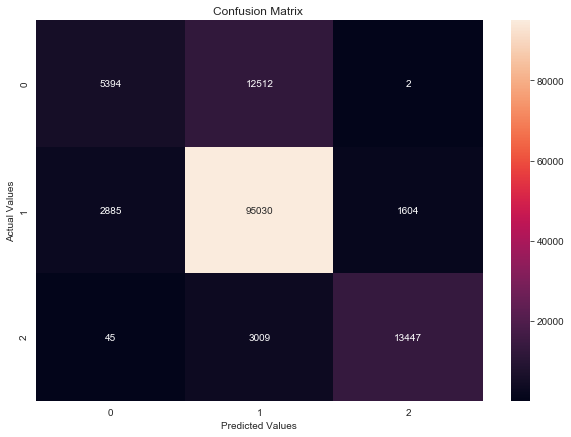

In [30]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True,fmt='g',cmap='copper')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [31]:
acc = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy: {}%".format(acc))

Accuracy: 85.02%


Note: Accuracy can be improved if trained for higher number of epochs

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.30      0.41     17908
           1       0.86      0.95      0.90     99519
           2       0.89      0.81      0.85     16501

    accuracy                           0.85    133928
   macro avg       0.80      0.69      0.72    133928
weighted avg       0.84      0.85      0.83    133928



In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #splitting

log_class=LogisticRegression()
log_class.fit(X_train,y_train)
print("--Accuracy--")
print(log_class.score(X_test,y_test))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressio

--Accuracy--
0.813041335643032


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
print("--Accuracy--")
print(classifier.score(X_test,y_test))

--Accuracy--
0.9422898871035184


In [39]:
y_pred = classifier.predict(X_test) 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm1 = confusion_matrix(y_test, y_pred)

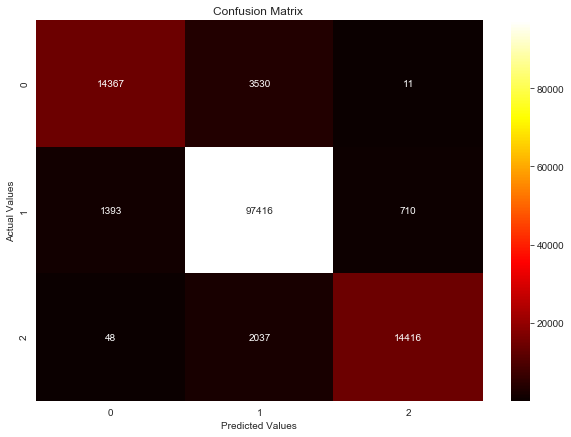

In [40]:
plt.figure(figsize=(10,7))
p = sns.heatmap(cm1, annot=True,fmt='g',cmap='hot')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [41]:
X_predict=np.array(["5%!tg3@an"])
X_predict=vectorizer.transform(X_predict)
y_pred=classifier.predict(X_predict)
print(y_pred)

[2]


###### Creating pickle file

In [ ]:
import pickle

In [ ]:
pickle.dump(classifier, open("C:/Users/hp/Desktop/Password_strength/password-model.pkl", 'wb'))

In [ ]:
pickle.dump(vectorizer, open("C:/Users/hp/Desktop/Password_strength/cv-transform.pkl", 'wb'))